# https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
 df = pd.read_csv("marketing__campaign.csv", delimiter="\t")  # Use tab delimiter
 # df = pd.read_csv("marketing__campaign.csv", sep=None)
# print(df.head())

In [5]:
df.shape

(2240, 29)

In [6]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [7]:
df.dtypes

,0
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
df.isnull().sum() # Missing values per column

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [10]:
categorical_cols = df.select_dtypes(include=['object']).columns  # Select categorical columns
for col in categorical_cols:
    print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'Education': ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Unique values in 'Marital_Status': ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Unique values in 'Dt_Customer': ['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12-2012' '31-08-2012'
 '28-03-2013' '03-11-2012' '08-08-2012' '06-01-2013' '23-12-2012'
 '11-01-2014' '18-03-2013' '02-01-2013' '27-05-2013' '20-02-2013'
 '31-05-2013' '22-11-2013' '22-05-2014' '11-05-2013' '29-10-2012'
 '29-08-2013' '31-12-2013' '02-09-2013' '11-02-2014' '01-02-2013'
 '29-04-2013' '12-03-2013' '05-11-2013' '02-10-2013' '28-06-2014'
 '09-11-2012' '24-05-2013' '01-01-2014' '08-11-2012' '12-05-2014'
 '11-08-2012' '07-06-2014' '12-06-2013' '19-11-2012' '02-04-2013'
 '28-04-2014' '17-06-2013' '03-03-2014' '04-07-2013' '07-09-2012'
 '18-02-2013' '11-06-2013' '06-12-2013' '21-05-2013' 

In [11]:
mean= df['Income'].mean()
print(mean)

52247.25135379061


In [12]:
df['Income']= df['Income'].fillna(mean)

In [13]:
df.isnull().sum() # Missing values per column

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


**Feature Engineering**

Let us create a new column Age by using year of birth

In [14]:
df['Age']= 2025-df['Year_Birth']

In [15]:
df['Age']

,Age
0,68
1,71
2,60
3,41
4,44
...,...
2235,58
2236,79
2237,44
2238,69


Creating extra features like total money spent, family size

In [16]:
# Calculate Total Spending
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['TotalSpending'] = df[spending_cols].sum(axis=1)

#Calculate family size
df["Relation"] = df["Marital_Status"].replace({"Married": 2, "Together": 2, "Absurd": 1, "Widow": 1, "YOLO": 1, "Divorced": 1, "Single": 1, "Alone": 1})
df["Children"] = df["Kidhome"]+ df["Teenhome"]
df["Family_Size"] = df["Relation"]+ df["Children"]

<ipython-input-16-3021fa9eace0>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Relation"] = df["Marital_Status"].replace({"Married": 2, "Together": 2, "Absurd": 1, "Widow": 1, "YOLO": 1, "Divorced": 1, "Single": 1, "Alone": 1})


In [17]:
print(df[['TotalSpending', 'Family_Size']].head())

   TotalSpending  Family_Size
0           1617            1
1             27            3
2            776            2
3             53            3
4            422            3


In [18]:
df= df.drop(['Relation','Children'],axis=1)

In [19]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'TotalSpending', 'Family_Size'],
      dtype='object')

In [20]:
df['Education'].value_counts()

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


Separating Features and Target

In [21]:
# Define target variable
y = df["Response"]  # Target variable

# Define feature variables (excluding the target column)
X = df.drop(columns=["Response"])

Encode categorical columns using One-Hot Encoding for nominal data

In [22]:
# Select categorical columns (object dtype)
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)  # Avoid dummy variable trap

Normalize/Scale Numerical Features using StandardScaler

In [23]:
# Select numerical columns
numerical_cols = X_encoded.select_dtypes(include=['int64', 'float64']).columns

# Apply StandardScaler
scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])

Train-Test Split

In [24]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Model Selection
1. Logistic Regression - Good for interpretability, but may struggle with complex relationships.
2. Decision Tree - Captures non-linear patterns but prone to overfitting.
3. Random Forest - Reduces overfitting, performs well with feature interactions.



In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

**Logistic Regression Model**

In [26]:
# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.8861607142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.94       381
           1       0.72      0.39      0.50        67

    accuracy                           0.89       448
   macro avg       0.81      0.68      0.72       448
weighted avg       0.87      0.89      0.87       448



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


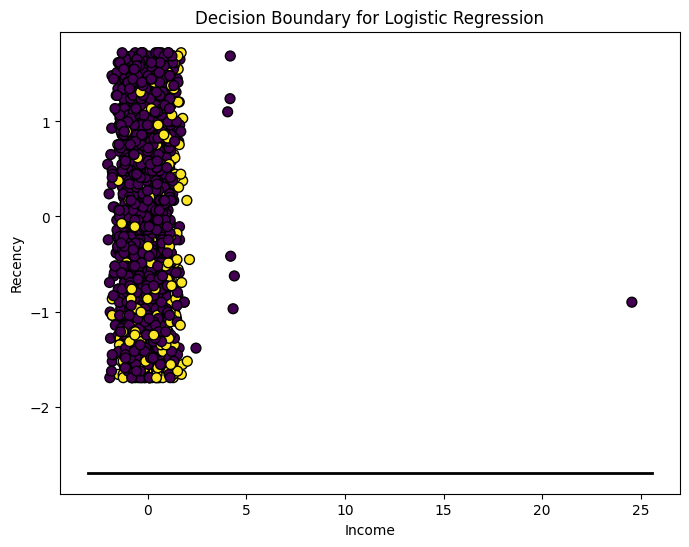

In [27]:
# Selecting 'Income' and 'Recency' as features for visualization
X_subset = X_train[['Income', 'Recency']]
y_subset = y_train  # target variable

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_subset, y_subset)

x_min, x_max = X_subset.iloc[:, 0].min() - 1, X_subset.iloc[:, 0].max() + 1
y_min, y_max = X_subset.iloc[:, 1].min() - 1, X_subset.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Get decision boundary prediction
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.scatter(X_subset.iloc[:, 0], X_subset.iloc[:, 1], c=y_subset, edgecolors='k', marker='o', s=50)

# Plot the decision boundary
plt.plot(xx[0], yy[0], 'k-', linewidth=2)
plt.title("Decision Boundary for Logistic Regression")
plt.xlabel("Income")
plt.ylabel("Recency")
plt.show()

**Decision Tree Model**

In [28]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8616071428571429
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       381
           1       0.55      0.45      0.49        67

    accuracy                           0.86       448
   macro avg       0.73      0.69      0.71       448
weighted avg       0.85      0.86      0.86       448



**Random Forest Model**


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Optimized Random Forest Accuracy: 0.890625
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       381
           1       0.78      0.37      0.51        67

    accuracy                           0.89       448
   macro avg       0.84      0.68      0.72       448
weighted avg       0.88      0.89      0.87       448



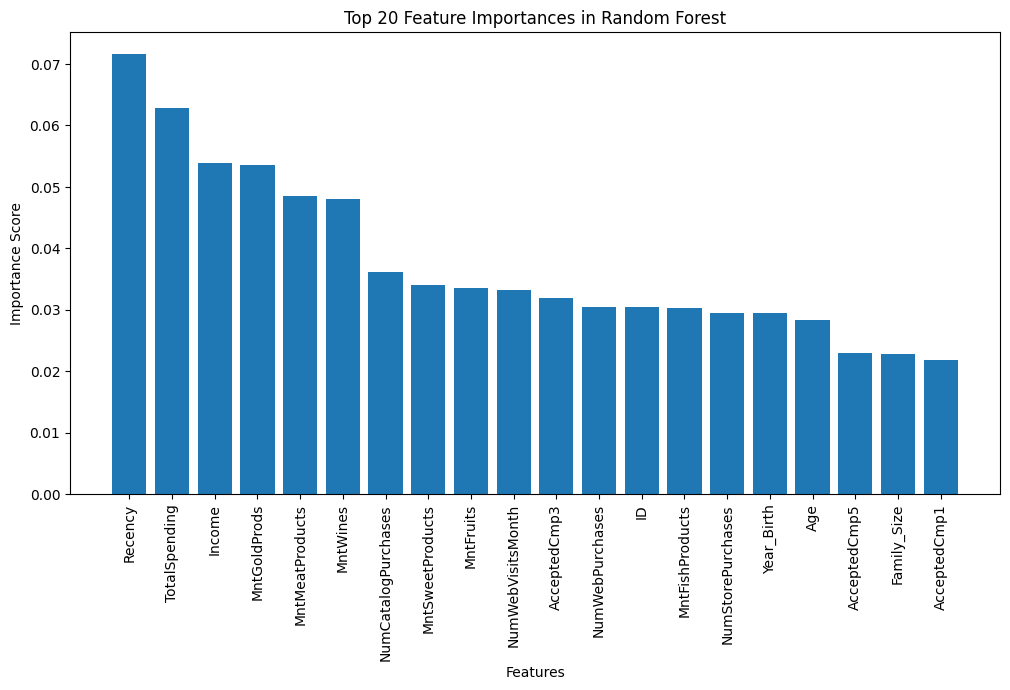


Performance Summary:
- Model achieved 89.06% accuracy.
- Precision, Recall, and F1-Score are evaluated for both classes.
- The model's performance on the imbalanced dataset is analyzed using class weights.
- Future improvements: Consider tuning hyperparameters or experimenting with more advanced models like XGBoost.


In [29]:
from sklearn.model_selection import GridSearchCV

# Define the Random Forest model with Class Weighting
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define Hyperparameter Grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for Hyperparameter Tuning
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model after tuning
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Final Performance Report
print("Optimized Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature Importance Analysis (Top 20 Features)
feature_importances = best_model.feature_importances_

# Get feature names directly from X_train (assuming X_train is a DataFrame)
feature_names = X_train.columns

# Sort features by importance (descending order)
indices = np.argsort(feature_importances)[::-1]

# Select Top 20 Features
top_n = 20
top_features = np.array(feature_names)[indices][:top_n]
top_importances = feature_importances[indices][:top_n]

# Plot Feature Importance (Top 20)
plt.figure(figsize=(12, 6))
plt.title("Top 20 Feature Importances in Random Forest")
plt.bar(range(top_n), top_importances, align="center")
plt.xticks(range(top_n), top_features, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

# Model Evaluation Insights
print("\nPerformance Summary:")
print(f"- Model achieved {accuracy_score(y_test, y_pred) * 100:.2f}% accuracy.")
print("- Precision, Recall, and F1-Score are evaluated for both classes.")
print("- The model's performance on the imbalanced dataset is analyzed using class weights.")
print("- Future improvements: Consider tuning hyperparameters or experimenting with more advanced models like XGBoost.")



In [30]:
# Summary of Model Performance
print("\nComparison of Models:")
print(f"- Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log) * 100:.2f}%")
print(f"- Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt) * 100:.2f}%")
print(f"- Random Forest Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")


Comparison of Models:
- Logistic Regression Accuracy: 88.62%
- Decision Tree Accuracy: 86.16%
- Random Forest Accuracy: 89.06%


**Logistic Regression:**
Although it achieved 88.62% accuracy, Logistic Regression assumes a linear relationship between features and the target variable. This makes it less effective in capturing complex patterns in the data. Additionally, it struggles with imbalanced datasets, leading to lower recall for the minority class.

**Decision Tree:** While Decision Tree achieved 86.16% accuracy, it captures non-linear patterns but is highly prone to overfitting. It may perform well on training data but poorly on unseen data. It also tends to be sensitive to small variations in data, making it less stable compared to ensemble methods like Random Forest.

**Random Forest:** With the highest accuracy of 89.06%, Random Forest is the most effective model. It handles imbalanced datasets better by using class weighting, reducing bias towards the majority class. It is more robust, combining multiple decision trees to reduce overfitting. It also captures complex relationships and non-linearity better than Logistic Regression, which assumes a linear relationship. Furthermore, Random Forest's feature importance analysis offers valuable insights into the factors driving predictions, making it highly useful for real-world applications.